# Final Project: Industry Analysis

## Part 1. Quantitative Analysis of the Industry Sector

### A. Industry Sector Selection and Data Filtering

1. The industry sector that our group chose is "56 Apparel And Accessory Stores". 

In [4]:
# 2. Filtering data
# import public firm data
import pandas as pd

firms = pd.read_csv("data/public_firms.csv")
firms.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


2. Next, filter the data in "data/public_firms.csv" to only include the firms belonging to the industry sector(s) you have selected. 

In [ ]:
# Filtering firms belonging to the "Apparel And Accessory Stores" industry sector 
# (major_group = 56)

# Major group 56 corresponds to SIC codes starting with 56
filtered = firms[(firms["sic"] >= 5600) & (firms["sic"] < 5700)].copy()

# Display number of rows after filtering and show first few rows
print("Number of rows after filtering:", len(filtered))
filtered.head()

Number of rows after filtering: 1367


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429


3.	Now, answer the following questions based on the filtered dataset: 
    1. How many unique firm-year ("fyear") observations are there in the filtered dataset?
    2. How many unique firms are there in the filtered dataset?
    3. How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [ ]:
# 3. Questions based on filtered dataset

# a. unique firm-year observations
# Each row is one firm (gvkey) in one year (fyear).
# drop_duplicates() is used on [gvkey, fyear] to make sure that if a firm-year appears 
# more than once in the dataset, it is only counted once.
n_firmyear = filtered[["gvkey", "fyear"]].drop_duplicates().shape[0]
print("a) Unique firm-year observations:", n_firmyear)

# b. unique firms (using gvkey)
unique_firms = filtered["gvkey"].nunique()
print("b) Unique firm observations:", unique_firms)

# c. firms that have records for all 27 years (1994–2020)
# count how many distinct years each firm appears in
full_period_firms = (filtered.groupby("gvkey")["fyear"].nunique())
# count how many == 27 (ie. how many in all years)   
full_period_firms = (full_period_firms == 27).sum() 
print("c) Number of firms with records for all 27 years:", full_period_firms)

a) Unique firm-year observations: 1367
b) Unique firm observations: 105
c) Number of firms with records for all 27 years: 11


### B. Preliminary Analysis
1.	What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [7]:
# firms in year 2020
firms_2020 = filtered[filtered["fyear"] == 2020]
# top 10 firms in 2020 by stock price
top_10_2020 = firms_2020.sort_values(by="prcc_c", ascending=False).head(10)
print("Top 10 firms in 2020 by stock price:")
top_10_2020

Top 10 firms in 2020 by stock price:


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
68733,18675,2020,USA,BURLINGTON STORES INC,2013/10/02,5600,261.55,1380.276,-216.499,6781.092,5763.980,-0.031927
33774,9248,2020,USA,ROSS STORES INC,NaN,5651,122.81,4819.293,85.382,12717.867,12531.565,0.006714
43543,11672,2020,USA,TJX COS INC (THE),NaN,5651,68.29,10469.570,90.470,30813.555,32136.962,0.002936
141569,65430,2020,USA,CHILDRENS PLACE INC,1997/09/19,5600,50.10,63.548,-140.365,1140.127,1522.598,-0.123113
184708,163051,2020,USA,CITI TRENDS INC,2005/05/18,5651,49.68,123.177,23.978,494.593,783.294,0.048480
76291,21898,2020,USA,BOOT BARN HOLDINGS INC,2014/10/30,5661,43.36,73.148,59.386,933.581,893.491,0.063611
43244,11584,2020,USA,FOOT LOCKER INC,NaN,5661,40.44,1680.000,323.000,7043.000,7548.000,0.045861
94181,27938,2020,USA,SHOE CARNIVAL INC,1993/03/16,5661,39.18,106.532,15.991,642.747,976.765,0.024879
23067,6733,2020,USA,BATH & BODY WORKS INC,NaN,5600,37.19,3903.000,844.000,11571.000,11847.000,0.072941
184613,162988,2020,USA,ZUMIEZ INC,2005/05/06,5651,36.78,73.622,76.227,998.364,990.652,0.076352


2.	What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [8]:
# sales of firms in the entire history
total_sales = filtered.groupby(["gvkey", "conm"])["sale"].sum().reset_index()
total_sales.rename(columns={"sale": "total_sales"}, inplace=True)
# total_sales is a dataframe with gvkey, conm, and total_sales columns
top_10_sales = total_sales.sort_values(by="total_sales", ascending=False).head(10)
print("Top 10 firms by total sales over the entire history:")
top_10_sales


Top 10 firms by total sales over the entire history:


,gvkey,conm,total_sales
23,11672,TJX COS INC (THE),531354.915
11,4990,GAP INC,362527.300
14,6733,BATH & BODY WORKS INC,274942.175
16,7922,NORDSTROM INC,248159.506
19,9248,ROSS STORES INC,188529.105
22,11584,FOOT LOCKER INC,167706.000
72,63643,ABERCROMBIE & FITCH -CL A,67874.646
7,4072,ASCENA RETAIL GROUP INC,65366.513
61,30059,AMERN EAGLE OUTFITTERS INC,63138.850
41,24171,DESIGNER BRANDS INC,57096.129


3.	What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations. 

In [9]:
# group by location
firms_by_location = filtered.groupby("location")["gvkey"].nunique().reset_index()
firms_by_location.rename(columns={"gvkey": "num_firms"}, inplace=True)
# sort by number of firms in descending order
firms_by_location = firms_by_location.sort_values(by="num_firms", ascending=False).head(10)
print("Number of firms by location (top 10):")
firms_by_location

Number of firms by location (top 10):


,location,num_firms
1,USA,104
0,CAN,1


4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years.

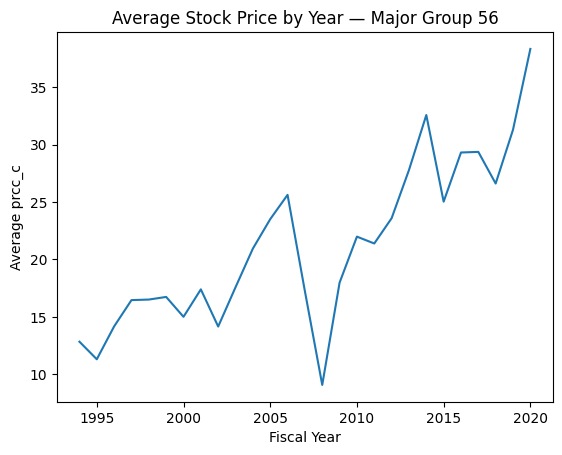

In [10]:
import matplotlib.pyplot as plt

avg_price_by_year = (filtered
                     .groupby("fyear", as_index=False)["prcc_c"]
                     .mean())

plt.plot(avg_price_by_year["fyear"], avg_price_by_year["prcc_c"])  
plt.title("Average Stock Price by Year — Major Group 56")
plt.xlabel("Fiscal Year")
plt.ylabel("Average prcc_c")
plt.show()   


5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [11]:
# 1) avg price per firm-year in 2007 & 2008
avg = (filtered[ filtered["fyear"].isin([2007, 2008]) ]
         .groupby(["gvkey","conm","fyear"])["prcc_c"].mean().reset_index())

# 2) split and rename
prices_2007 = avg[avg["fyear"]==2007][["gvkey","conm","prcc_c"]]
prices_2007.columns=["gvkey","conm","p2007"]

prices_2008 = avg[avg["fyear"]==2008][["gvkey","conm","prcc_c"]]
prices_2008.columns=["gvkey","conm","p2008"]

# 3) merge & compute change (negative = drop)
merged_prices = prices_2007.merge(prices_2008, on=["gvkey","conm"])
merged_prices["percent_change_2007_to_2008"] = (merged_prices["p2008"] - merged_prices["p2007"]) / merged_prices["p2007"]

# 4) largest drop = most negative change
result = merged_prices.sort_values("percent_change_2007_to_2008").head(1)[
    ["conm","p2007","p2008","percent_change_2007_to_2008"]
]

print(result)


                        conm  p2007  p2008  percent_change_2007_to_2008
44  EDDIE BAUER HOLDINGS INC   6.35   0.51                    -0.919685


6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.

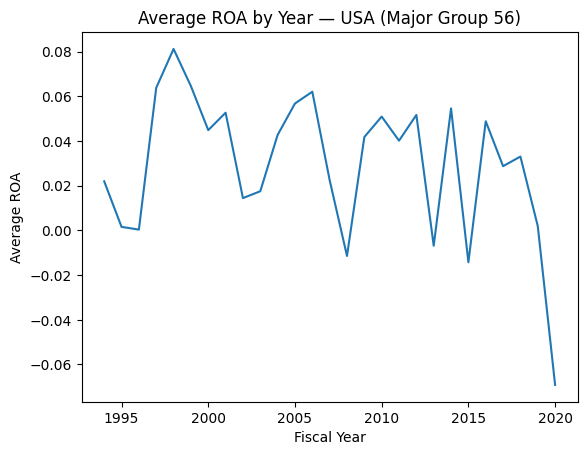

In [12]:
# Average ROA by year for USA firms (ROA = ni / asset)

usa = filtered[ filtered["location"] == "USA" ]
usa = usa[ usa["asset"] > 0 ]          
usa["roa"] = usa["ni"] / usa["asset"]

roa_by_year = usa.groupby("fyear")["roa"].mean().reset_index()

plt.plot(roa_by_year["fyear"], roa_by_year["roa"])
plt.title("Average ROA by Year — USA (Major Group 56)")
plt.xlabel("Fiscal Year")
plt.ylabel("Average ROA")
plt.show()

## Part 2. Text Analysis on the Industry Sector


### C. Text Cleaning

In [13]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('stopwords')

def clean_text(text):
    """
    Clean text by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Removing stopwords
    """
    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back together
    return ' '.join(words)


# After uploading, read the file directly:
df = pd.read_csv('data/2020_10K_item1_full.csv', on_bad_lines='skip', engine='python')

# Apply text cleaning to 'item_1_text' column and create new column 'cleaned_text'
df['cleaned_text'] = df['item_1_text'].apply(clean_text)

# Display the first few rows to verify the cleaning
print("\nFirst few rows of the cleaned dataset:")
print(df[['item_1_text', 'cleaned_text']].head())

# Please continue to use dataframe df, or uncomment below to save the cleaned dataset on a new csv. file
#df.to_csv('data/2020_10K_item1_cleaned.csv', index=False)
#print("\nCleaned dataset has been saved to '2020_10K_item1_cleaned.csv'")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JessicaShi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



First few rows of the cleaned dataset:
                                         item_1_text  \
0  fixed expenses are previosuly documented in an...   
1  General Hurco Companies, Inc. is an internatio...   
2  We have been engaged in the business of develo...   
3  CORPORATE HISTORY Chun Can Capital Group (form...   
4  CORPORATE HISTORY Chun Can Capital Group (form...   

                                        cleaned_text  
0  fixed expenses previosuly documented 8k 235000...  
1  general hurco companies inc international indu...  
2  engaged business developing marketing products...  
3  corporate history chun capital group formerly ...  
4  corporate history chun capital group formerly ...  


Name, version, company of AI tool: 
ChatGPT (GPT-5), OpenAI

Chat objective: 
- I used ChatGPT to get help writing and checking parts of my code.

Use of AI-generated content: 
- ChatGPT suggested example code and explained how to clean data, build the model, and fix small bugs. I edited the code based on its advice.

URL of chat history: 
https://chatgpt.com/share/68e1c74c-4814-8002-ba60-b9ab624b25d7

Time and date of chat: 
Sep.28, 2025

### D. Key Words Analysis

In [ ]:
# 1. Create a new dataframe with only firms in the selected industry
import pandas as pd

# [AI-assisted] See AI_CITATION in the next markdown cell for details.
# --- sanity checks: make sure required columns exist ---
assert {"gvkey","fyear"}.issubset(filtered.columns), "filtered must have 'gvkey' and 'fyear'"
assert "conm" in filtered.columns, "filtered should include firm name 'conm'"
assert {"gvkey","cleaned_text"}.issubset(df.columns), "df must have 'gvkey' and 'cleaned_text' from Part C"

# 1) sector subset in 2020 (one row per firm)
sector_2020 = (
    filtered.loc[filtered["fyear"] == 2020, ["gvkey","conm","location","fyear"]]
    .drop_duplicates(subset=["gvkey"])
)

# 2) inner join with cleaned text (from df)
dfD = (
    sector_2020
    .merge(df[["gvkey","cleaned_text"]], on="gvkey", how="inner")
)

print("Sector firms in 2020 (unique gvkey):", len(sector_2020))
print("After inner join with cleaned 10-K text:", len(dfD))
dfD.head()

Sector firms in 2020 (unique gvkey): 26
After inner join with cleaned 10-K text: 23


,gvkey,conm,location,fyear,cleaned_text
0,2818,CATO CORP -CL A,USA,2020,general company founded 1946 operated 1281 fas...
1,4990,GAP INC,USA,2020,general gap inc gap inc company incorporated s...
2,5109,GENESCO INC,USA,2020,general genesco inc genesco company us incorpo...
3,6733,BATH & BODY WORKS INC,USA,2020,general l brands inc company operates highly c...
4,7922,NORDSTROM INC,USA,2020,description business founded 1901 retail shoe ...


Name, version, company of AI tool:
ChatGPT (GPT-5), OpenAI

Chat objective:
Help me add robust sanity checks before merging `filtered` (Compustat subset) with `df` (cleaned 10-K text).

Use of AI-generated content:
ChatGPT provided a lot of sanity checks codes. I edited the code by picking part of the sanity checks that I need.

URL of chat history:
https://chatgpt.com/s/t_68e1edc965608191a4ea802de23b4320

Time and date of chat:
2025-09-29

In [ ]:
# D2. Top-10 keywords per firm (Counts & TF-IDF)

# --- 1) Word-counts method ---
from collections import Counter

def get_top_keywords(text, k=10):
    """Return the top-k most frequent tokens in a single document."""
    if not isinstance(text, str):
        text = ""
    words = text.split()
    c = Counter(words)
    return " ".join([w for w, _ in c.most_common(k)])

dfD["top10_count"] = dfD["cleaned_text"].apply(lambda s: get_top_keywords(s, k=10))

# --- 2) TF-IDF method ---
!pip3 install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# AI citation for this part. Included in the markdown cell below.
def get_keywords_tfidf(document_list, k=10, max_features=5000, min_df=2):
    """
    Compute top-k TF-IDF keywords for each document.
    Returns a list[str], each string contains k space-joined keywords.
    """
    vectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df, lowercase=False)
    tfidf_matrix = vectorizer.fit_transform(document_list)   # CSR matrix: (n_docs, n_terms)
    feature_names = vectorizer.get_feature_names_out()

    top_keywords = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i, :]               # 1 x n_terms CSR row
        idx = row.nonzero()[1]                 # column indices of non-zero terms
        if idx.size == 0:
            top_keywords.append("")            # fallback for empty documents
            continue

        # Convert the TF-IDF scores for the non-zero terms to a 1D array
        vals = row[0, idx].toarray().ravel()
        # Take indices of the top-k scores in descending order
        order = np.argsort(vals)[::-1][:k]
        words = feature_names[idx[order]]
        top_keywords.append(" ".join(words))

        if i % 200 == 199:
            print(f"Processed {i+1}/{tfidf_matrix.shape[0]} documents.")
            
    return top_keywords

In [16]:
# Print out results
docs = dfD["cleaned_text"].fillna("").tolist()
dfD["top10_tfidf"] = get_keywords_tfidf(docs, k=10)
preview = (
    dfD.loc[:, ["gvkey", "conm", "top10_count", "top10_tfidf"]]
       .head(10)                     # get the top 10 rows
       .reset_index(drop=True)       # remove the 0-based index
)
preview.index = preview.index + 1    # change index to 1-10
display(preview)

,gvkey,conm,top10_count,top10_tfidf
1,2818,CATO CORP -CL A,company merchandise stores sales credit store ...,company merchandise stores layaway credit sale...
2,4990,GAP INC,president gap vice executive stores brand appa...,gap president vice navy executive republic off...
3,5109,GENESCO INC,footwear stores 2020 fiscal operations retail ...,footwear stores dockers group 2020 license fis...
4,6733,BATH & BODY WORKS INC,secret victoria stores body 2020 products fina...,secret victoria body bath works coronavirus st...
5,7922,NORDSTROM INC,nordstrom customers merchandise stores invento...,nordstrom fullprice rack club customers mercha...
6,9248,ROSS STORES INC,stores merchandise discounts ross dd departmen...,ross dd discounts merchandise stores store dep...
7,11584,FOOT LOCKER INC,system clearpoint device fda may medical brain...,device medical system procedures healthcare de...
8,13381,DESTINATION XL GROUP INC,stores store dxl fiscal customers casual merch...,stores store casual fiscal merchandise custome...
9,18675,BURLINGTON STORES INC,stores fiscal merchandise store believe inform...,stores burlington fiscal merchandise store wea...
10,21898,BOOT BARN HOLDINGS INC,magnegas date company gasification us units pr...,date gas units industrial issue fuel company f...


Name, version, company of AI tool:
ChatGPT (GPT-5), OpenAI

Chat objective:
To get help on completing the TF-IDF keyword extraction code and add a clearer way to extract top-k terms.

Use of AI-generated content:
Used suggested lines for converting sparse rows to dense arrays and ranking top-k TF-IDF scores.

URL of chat history:
https://chatgpt.com/share/68e1f226-31c8-8009-a522-b23d22341820

Time and date of chat:
2025-09-30

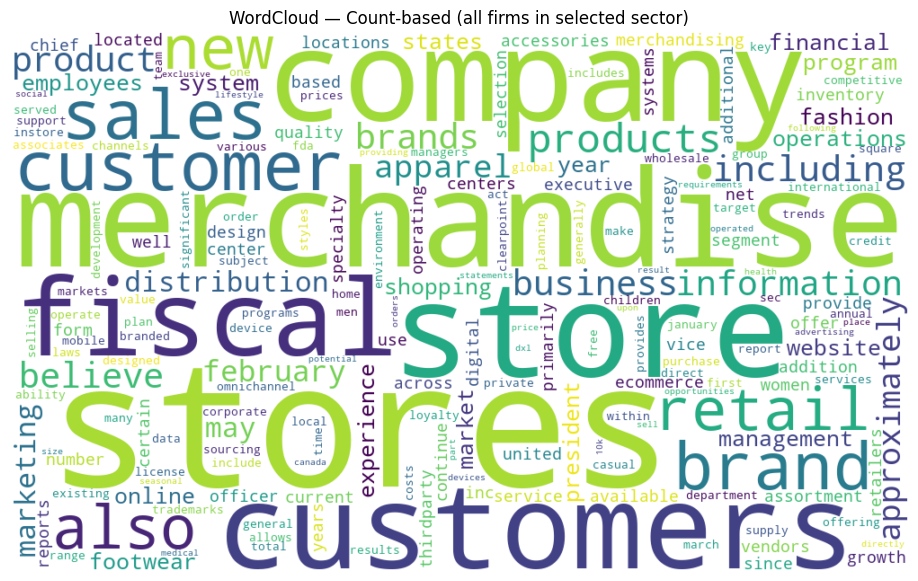

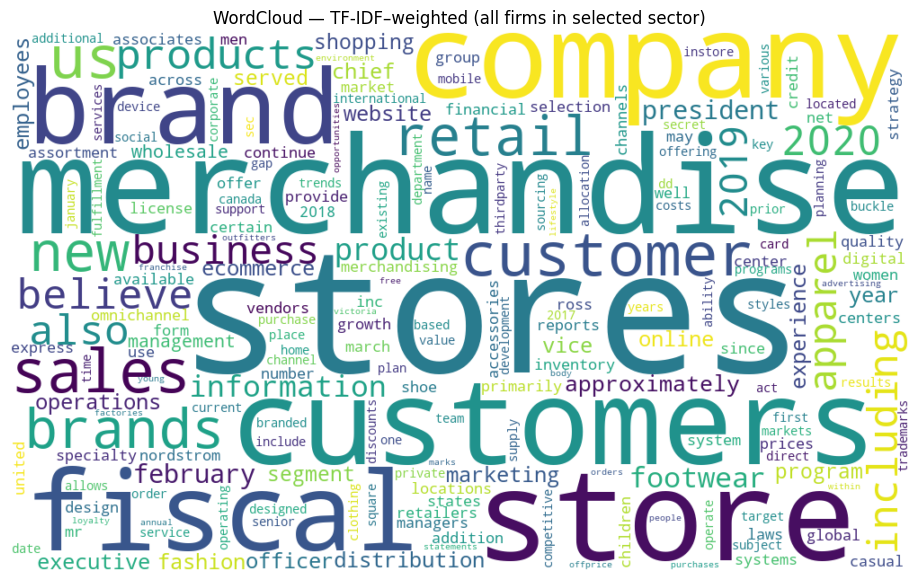

In [ ]:
# AI-citation included for this part. Included in the markdown cell below.
# D3. Wordclouds for the selected sector based on word counts and TF-IDF scores.
!pip install wordcloud scikit-learn
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) Count-based wordcloud
# Build a global frequency dictionary from all cleaned tokens
all_tokens = " ".join(dfD["cleaned_text"].fillna("")).split()
freq = Counter(all_tokens)

# Filter out very short tokens or pure numbers
freq = {w: c for w, c in freq.items() if len(w) > 2 and not w.isdigit()}

# Generate the wordcloud from raw counts
wc_counts = WordCloud(width=1000, height=600, background_color="white")
wc_counts = wc_counts.generate_from_frequencies(freq)

plt.figure(figsize=(12, 7))
plt.imshow(wc_counts, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud — Count-based (all firms in selected sector)")
plt.show()

# 2) TF-IDF–based wordcloud
# Fit TF-IDF on the same cleaned texts
docs = dfD["cleaned_text"].fillna("")
vectorizer = TfidfVectorizer(
    max_features=5000,   # cap vocab size to reduce noise & speed up
    min_df=2,            # ignore terms appearing in < 2 documents
    lowercase=False      # already lowercased in the cleaning step
)
X = vectorizer.fit_transform(docs)            # CSR matrix: (n_docs, n_terms)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores across documents to get a global weight per term
scores = np.asarray(X.sum(axis=0)).ravel()    # shape: (n_terms,)

# keep top-N words to make the cloud cleaner
topN = 300
top_idx = scores.argsort()[::-1][:topN]
tfidf_freq = {feature_names[i]: float(scores[i]) for i in top_idx}

wc_tfidf = WordCloud(width=1000, height=600, background_color="white")
wc_tfidf = wc_tfidf.generate_from_frequencies(tfidf_freq)

plt.figure(figsize=(12, 7))
plt.imshow(wc_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud — TF-IDF–weighted (all firms in selected sector)")
plt.show()

Name, version, company of AI tool:
ChatGPT (GPT-5), OpenAI
Chat objective:
To refine and simplify Python code for generating count-based and TF-IDF-based wordclouds.

Use of AI-generated content:
Used AI suggestions to reorganize code, add basic token filtering, and improve TF-IDF aggregation logic.

URL of chat history:
https://chatgpt.com/share/68e1f6f8-3c7c-8009-9335-ca461692bfba

Time and date of chat:
2025-09-30

### E. Word Embedding

1.	Train a word2vec model with the full 10-K sample (e.g., "data/2020_10K_item1_full.csv"). Please use the cleaned text (e.g., results from Step C) for training.

In [21]:
import pandas as pd
from gensim.models import Word2Vec

df.to_csv('data/2020_10K_item1_cleaned.csv', index=False)
# Load the cleaned dataset
df_cleaned = pd.read_csv('data/2020_10K_item1_cleaned.csv')
df_cleaned

,cik,year,name,item_1_text,gvkey,cleaned_text
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
...,...,...,...,...,...,...
5149,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829,general rf industries ltd together subsidiarie...
5150,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430,background capital structure know labs inc inc...
5151,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050,general gee group inc company us incorporated ...
5152,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595,general gulfslope energy inc independent crude...


In [22]:
# list of list of words
docs = [row.split() for row in df_cleaned['cleaned_text']] # split each row into a list of words

print(docs[0]) # ACCESS-POWER INC

['fixed', 'expenses', 'previosuly', 'documented', '8k', '235000', 'operate', 'part', 'time', 'work', 'home', 'business', 'company', 'subcontracts', 'big', 'call', 'center', 'provides', 'sales', 'customer', 'service', 'big', 'fortune', '500', 'companies', '2019', 'operated', 'via', 'hunter', 'vunter', 'subsidiary', 'wwwliveopscom', 'ended', 'relationship', 'liveops', 'may', '1st', '2019', 'result', 'hunter', 'venture', 'officially', 'dissolved', 'company', 'struggled', 'may', '1', '2019', 'october', '18', '2019', 'income', 'period', 'operational', 'expenses', 'paid', 'patrick', 'j', 'jensen', 'donation', 'company', 'personally', 'paid', 'pocket', 'expenses', 'dark', 'time', 'october', '2', '2019', 'dreamed', 'getting', 'greys', 'accr', 'dream', 'right', 'nowthis', 'builders', 'work', 'october', '18', '2019', 'acquired', 'grand', 'mm', 'llc', 'entity', 'subsidiary', 'operating', 'entity', 'similar', 'hunter', 'venture', 'entity', 'registered', 'state', 'michigan', 'httpscofslarastatemius

In [23]:
# training word2vec model using the list of words in `sent`
model = Word2Vec(docs, min_count=5, vector_size=50, workers=3, window=5, sg = 1)

In [24]:
# save the model for future use; you don't need to train Word2Vec for multiple times
model.save("word2vec.model")

# load model from stored file
model = Word2Vec.load("word2vec.model")

In [ ]:
# Get the word embeddings of a word
model.wv['data'] # word vectors, representing as correlations with other words

array([ 0.2167335 ,  0.12976418,  0.37481177, -0.40567958, -0.20760703,
        0.4785109 ,  0.13012397,  0.21538863, -0.28495672,  0.11830629,
        0.32901734, -0.71010005, -0.29770213, -0.33793455,  0.31308192,
        0.18980807, -0.22958684, -0.07271722, -0.1770904 , -0.42918262,
       -0.28795397, -0.03597316,  0.03082925,  0.64499575,  0.1983007 ,
       -0.20116249, -0.15200149,  0.12721232, -0.0083025 ,  0.19354194,
       -0.03051221, -0.1573964 , -0.88838255, -0.41118822, -0.05188177,
        0.1011981 ,  0.92374694,  0.66109514,  0.64821506, -0.16643474,
        0.53707033,  0.02000065, -0.22063094,  0.9120572 ,  0.4190178 ,
       -0.01660325, -0.05138322, -0.1761308 ,  0.45687607, -0.36689037],
      dtype=float32)

2.	Manually inspect the wordclouds you generated in D.3 and choose three representative keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec model to find the most relevant five words for each of these three keywords.

- three representative keywords that are manually chosen (in TF-IDF weighed WordCloud): **merchandise, stores, fiscal**

In [27]:
# get most relevant 5 words
model.wv.most_similar('merchandise', topn=5)

[('inseason', 0.8675329685211182),
 ('assortments', 0.8416352272033691),
 ('assortment', 0.8303415179252625),
 ('retailer', 0.8284510374069214),
 ('stores', 0.8177821636199951)]

In [28]:
model.wv.most_similar('stores', topn=5)

[('fullprice', 0.9168290495872498),
 ('retail', 0.878244161605835),
 ('outlet', 0.8780942559242249),
 ('store', 0.867311954498291),
 ('retailers', 0.864636242389679)]

In [29]:
model.wv.most_similar('fiscal', topn=5)

[('year', 0.8933227062225342),
 ('fy20', 0.8749682903289795),
 ('ended', 0.8297439813613892),
 ('53week', 0.8183172941207886),
 ('bduring', 0.8132359981536865)]

## Part 3. Comprehensive Analysis of One Sample Firm
### F.	[Firm Analysis and Strategy Suggestion; 10 points] This is an open question. Pick one firm that your group is interested in and try to analyze its market status. The ultimate goal is to provide one valuable suggestion to the firm based on your analysis. 

- The firm we choose: **GAP INC**
    - It's a well-known brand.
    - It's among the top 10 firms by total sales over the entire history (top 2).
    - Out of our own curiosity.
- Our direction is: **Compare the revenue, market share, and ROA of the focal firm to its competitors and provide suggestions accordingly.**

#### F.1 Find the focal firm’s competing firms (or most similar firms)

In [ ]:
filtered[filtered["gvkey"] == 4990]  #GAP INC

# prcc_c: Price close (stock price)
# roa: Return on Assets = ni / asset
# ni: Net Income
# ch: Change in stock price

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
15929,4990,1994,USA,GAP INC,NaN,5651,30.500,414.487,320.240,2004.244,3722.940,0.159781
15930,4990,1995,USA,GAP INC,NaN,5651,42.000,579.566,354.039,2343.068,4395.253,0.151101
15931,4990,1996,USA,GAP INC,NaN,5651,30.125,485.644,452.859,2626.927,5284.381,0.172391
15932,4990,1997,USA,GAP INC,NaN,5651,35.437,913.169,533.901,3337.502,6507.824,0.159970
15933,4990,1998,USA,GAP INC,NaN,5651,56.125,565.253,824.539,3963.919,9054.462,0.208011
15934,4990,1999,USA,GAP INC,NaN,5651,46.000,450.352,1127.065,5188.756,11635.398,0.217213
15935,4990,2000,USA,GAP INC,NaN,5651,25.500,408.794,877.497,7012.908,13673.460,0.125126
15936,4990,2001,USA,GAP INC,NaN,5651,13.940,1035.749,-7.764,7682.823,13847.873,-0.001011
15937,4990,2002,USA,GAP INC,NaN,5651,15.520,3388.514,477.457,9902.004,14454.709,0.048218
15938,4990,2003,USA,GAP INC,NaN,5651,23.210,3334.000,1030.000,10343.000,15854.000,0.099584


In [43]:
# Note: These is one wrapper to compute firm-level embedding and similarity based on the word2vec model

import pandas as pd
import numpy as np

class DocumentSimilarity:

    def __init__(self, model, gvkeys, conm, keywordslist):
        '''
        Initialize the class
        model: the word2vec model 
        gvkeys: a list/pandas series of unique firm identifiers
        conm: a list/pandas series of company names
        keywordslist: a list of keywords

        gvkeys and keywordslist should be of the same length
        '''

        assert len(gvkeys) == len(keywordslist) == len(conm), "gvkeys, conm, keywordslist should should be of the same length"

        # store the information
        self.model = model
        self.firms = list(gvkeys)
        self.conm = list(conm)
        self.keywordslist = [x.split() for x in list(keywordslist)]

        # generate document embedding
        self.document_embeddings = [self.model.wv.get_mean_vector(x) for x in self.keywordslist]

        # convert to array to facilitate computation, normalize it
        self.document_array = np.array(self.document_embeddings)
        self.document_array = self.document_array / np.linalg.norm(self.document_array, axis=1)[:, np.newaxis]

    def get_firm_embedding(self, firm):
        '''Given the firm unique identifier, return the embedding of this firm'''

        return self.document_embeddings[self.firms.index(firm)]
    
    def similarity(self, firm1, firm2):
        '''Given two firms' unique identifiers, return the similarity between the two firms'''
        firm1 = self.document_embeddings[self.firms.index(firm1)]
        firm2 = self.document_embeddings[self.firms.index(firm2)]

        return np.dot(firm1, firm2) / (np.linalg.norm(firm1) * np.linalg.norm(firm2))
    
    def most_similar(self, firm, topn = 5):
        '''Given one firm unique identifier, return the topn similar firms to it
        firm: firm unique identifier
        topn: the number of firms to return
        '''
        
        v = self.document_embeddings[self.firms.index(firm)]
        v = v / np.linalg.norm(v)

        cosine_similarities = np.dot(self.document_array, v)

        # find the index of the top n companies
        sorted_indices = np.argsort(-cosine_similarities)
        largest_n_indices = sorted_indices[:topn + 1]

        return [(self.firms[x], self.conm[x], cosine_similarities[x]) for x in largest_n_indices[1:]]

In [55]:
# Load the wrapper the instructor team prepared for you 
from DocumentSimilarity import DocumentSimilarity

# Create an instance
docsim = DocumentSimilarity(model = model, gvkeys=dfD['gvkey'], conm = dfD['conm'], 
                       keywordslist = dfD['top10_tfidf'])

dfD.head()

,gvkey,conm,location,fyear,cleaned_text,top10_count,top10_tfidf
0,2818,CATO CORP -CL A,USA,2020,general company founded 1946 operated 1281 fas...,company merchandise stores sales credit store ...,company merchandise stores layaway credit sale...
1,4990,GAP INC,USA,2020,general gap inc gap inc company incorporated s...,president gap vice executive stores brand appa...,gap president vice navy executive republic off...
2,5109,GENESCO INC,USA,2020,general genesco inc genesco company us incorpo...,footwear stores 2020 fiscal operations retail ...,footwear stores dockers group 2020 license fis...
3,6733,BATH & BODY WORKS INC,USA,2020,general l brands inc company operates highly c...,secret victoria stores body 2020 products fina...,secret victoria body bath works coronavirus st...
4,7922,NORDSTROM INC,USA,2020,description business founded 1901 retail shoe ...,nordstrom customers merchandise stores invento...,nordstrom fullprice rack club customers mercha...


In [ ]:
# Get the newest competitors of GAP INC
docsim.get_firm_embedding(firm = 4990) #The firm's embedding based on word2vec vectors

array([ 1.01947889e-01, -5.33509776e-02,  2.68360274e-03, -5.58701996e-03,
       -6.16720319e-02, -7.61964694e-02,  9.87301990e-02,  1.66811526e-01,
       -2.62464672e-01, -9.56767350e-02,  6.61732182e-02, -1.51390180e-01,
        5.38418479e-02, -6.88766539e-02, -1.10217139e-01, -2.44282559e-02,
       -1.35178924e-01, -1.94108970e-02, -6.28303513e-02,  6.16440065e-02,
       -6.06615376e-03, -4.64933924e-02,  1.15342639e-01,  4.77449782e-02,
        7.70851690e-03, -8.86787996e-02, -2.37309895e-02, -1.15895689e-01,
       -1.63696051e-01, -3.23359743e-02,  1.40146479e-01, -1.65914729e-01,
        1.47464965e-02, -2.89070606e-02,  2.78107193e-03,  9.58833098e-02,
        1.07548796e-01, -1.44698378e-02,  8.95049125e-02, -8.10322538e-02,
        3.51927504e-02, -4.03572805e-02,  5.59792016e-03,  1.23808339e-01,
        1.36831397e-04,  5.76785207e-02,  1.54625282e-01, -1.38279676e-01,
       -1.18858315e-01,  7.14515299e-02], dtype=float32)

In [58]:
# most similar firms based on word2vec embeddings
docsim.most_similar(firm = 4990, topn = 10)

[(30059, 'AMERN EAGLE OUTFITTERS INC', 0.8956574),
 (27938, 'SHOE CARNIVAL INC', 0.8631838),
 (63643, 'ABERCROMBIE & FITCH  -CL A', 0.8466469),
 (25234, 'BUCKLE INC', 0.76645344),
 (65430, 'CHILDRENS PLACE INC', 0.6475903),
 (5109, 'GENESCO INC', 0.61832464),
 (9248, 'ROSS STORES INC', 0.6059051),
 (2818, 'CATO CORP  -CL A', 0.5982572),
 (6733, 'BATH & BODY WORKS INC', 0.5845339),
 (29150, 'URBAN OUTFITTERS INC', 0.57932174)]

**The top 10 competitors**:
- AMERN EAGLE OUTFITTERS INC
- SHOE CARNIVAL INC
- ABERCROMBIE & FITCH  -CL A
- BUCKLE INC
- CHILDRENS PLACE INC
- GENESCO INC
- ROSS STORES INC
- CATO CORP  -CL A
- BATH & BODY WORKS INC
- URBAN OUTFITTERS INC

#### F.2 Substract the revenue, market share and ROA of the target group of firms

In [61]:
target_frims = [x[1] for x in docsim.most_similar(firm = 4990, topn = 10)] + ['GAP INC']

target_firms = filtered[filtered['conm'].isin(target_frims)]
target_firms

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
7076,2818,1994,USA,CATO CORP -CL A,NaN,5621,7.2500,23.963,18.105,201.322,476.186,0.089931
7077,2818,1995,USA,CATO CORP -CL A,NaN,5621,7.7500,26.183,12.020,209.895,489.995,0.057267
7078,2818,1996,USA,CATO CORP -CL A,NaN,5621,5.0000,16.593,7.029,218.243,491.509,0.032207
7079,2818,1997,USA,CATO CORP -CL A,NaN,5621,8.8750,41.644,17.401,241.437,512.448,0.072073
7080,2818,1998,USA,CATO CORP -CL A,NaN,5621,9.8438,44.068,23.917,258.513,543.664,0.092518
...,...,...,...,...,...,...,...,...,...,...,...,...
141565,65430,2016,USA,CHILDRENS PLACE INC,1997/09/19,5600,100.9500,193.709,102.336,910.499,1785.316,0.112396
141566,65430,2017,USA,CHILDRENS PLACE INC,1997/09/19,5600,145.3500,244.519,84.698,940.228,1870.275,0.090082
141567,65430,2018,USA,CHILDRENS PLACE INC,1997/09/19,5600,90.0900,69.136,100.960,727.046,1938.084,0.138863
141568,65430,2019,USA,CHILDRENS PLACE INC,1997/09/19,5600,62.5200,68.487,73.300,1181.397,1870.667,0.062045


#### 0. Preprocessing

In [ ]:
tf = target_firms

# Standardize company names
tf["conm"] = tf["conm"].str.strip()

# Add Profit Margin
tf["profit_margin"] = tf["ni"] / tf["sale"]

# Replace inf values
tf = tf.replace([np.inf, -np.inf], np.nan)

tf

/var/folders/7x/90w6m75x04qg2r0z62mc8wh00000gn/T/ipykernel_21558/2734824269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf["conm"] = tf["conm"].str.strip()
/var/folders/7x/90w6m75x04qg2r0z62mc8wh00000gn/T/ipykernel_21558/2734824269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf["profit_margin"] = tf["ni"] / tf["sale"]


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,profit_margin
7076,2818,1994,USA,CATO CORP -CL A,NaN,5621,7.2500,23.963,18.105,201.322,476.186,0.089931,0.038021
7077,2818,1995,USA,CATO CORP -CL A,NaN,5621,7.7500,26.183,12.020,209.895,489.995,0.057267,0.024531
7078,2818,1996,USA,CATO CORP -CL A,NaN,5621,5.0000,16.593,7.029,218.243,491.509,0.032207,0.014301
7079,2818,1997,USA,CATO CORP -CL A,NaN,5621,8.8750,41.644,17.401,241.437,512.448,0.072073,0.033957
7080,2818,1998,USA,CATO CORP -CL A,NaN,5621,9.8438,44.068,23.917,258.513,543.664,0.092518,0.043992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141565,65430,2016,USA,CHILDRENS PLACE INC,1997/09/19,5600,100.9500,193.709,102.336,910.499,1785.316,0.112396,0.057321
141566,65430,2017,USA,CHILDRENS PLACE INC,1997/09/19,5600,145.3500,244.519,84.698,940.228,1870.275,0.090082,0.045286
141567,65430,2018,USA,CHILDRENS PLACE INC,1997/09/19,5600,90.0900,69.136,100.960,727.046,1938.084,0.138863,0.052093
141568,65430,2019,USA,CHILDRENS PLACE INC,1997/09/19,5600,62.5200,68.487,73.300,1181.397,1870.667,0.062045,0.039184


#### 1. Revenue (Sales) 

In [ ]:
# Create wide table of sales by firm and year
rev_tbl = (
    tf.pivot_table(index="fyear", columns="conm", values="sale", aggfunc="sum")
    .sort_index()
)
rev_tbl.round(3)

rev_tbl

conm,ABERCROMBIE & FITCH -CL A,AMERN EAGLE OUTFITTERS INC,BATH & BODY WORKS INC,BUCKLE INC,CATO CORP -CL A,CHILDRENS PLACE INC,GAP INC,GENESCO INC,ROSS STORES INC,SHOE CARNIVAL INC,URBAN OUTFITTERS INC
fyear,,,,,,,,,,,
1994,NaN,NaN,7544.692,145.038,476.186,NaN,3722.940,462.901,1262.544,NaN,110.121
1995,235.659,296.563,8117.037,172.292,489.995,122.060,4395.253,434.575,1426.397,228.263,133.036
1996,335.372,326.404,8644.791,206.393,491.509,143.838,5284.381,461.348,1689.810,233.945,156.414
1997,521.617,405.713,9188.804,267.922,512.448,192.557,6507.824,536.107,1988.692,246.520,173.121
1998,815.804,587.600,9346.911,337.916,543.664,283.853,9054.462,549.748,2182.361,280.157,208.969
1999,1042.056,832.104,9723.334,375.526,605.033,421.496,11635.398,573.720,2468.638,339.929,276.106
2000,1237.604,1093.477,10104.606,393.247,669.135,587.385,13673.460,680.166,2709.039,418.164,295.333
2001,1364.853,1371.899,9363.000,387.638,705.658,656.956,13847.873,746.821,2986.596,476.556,348.958
2002,1595.757,1463.141,8445.000,401.060,748.331,671.409,14454.709,828.307,3531.349,519.699,422.754


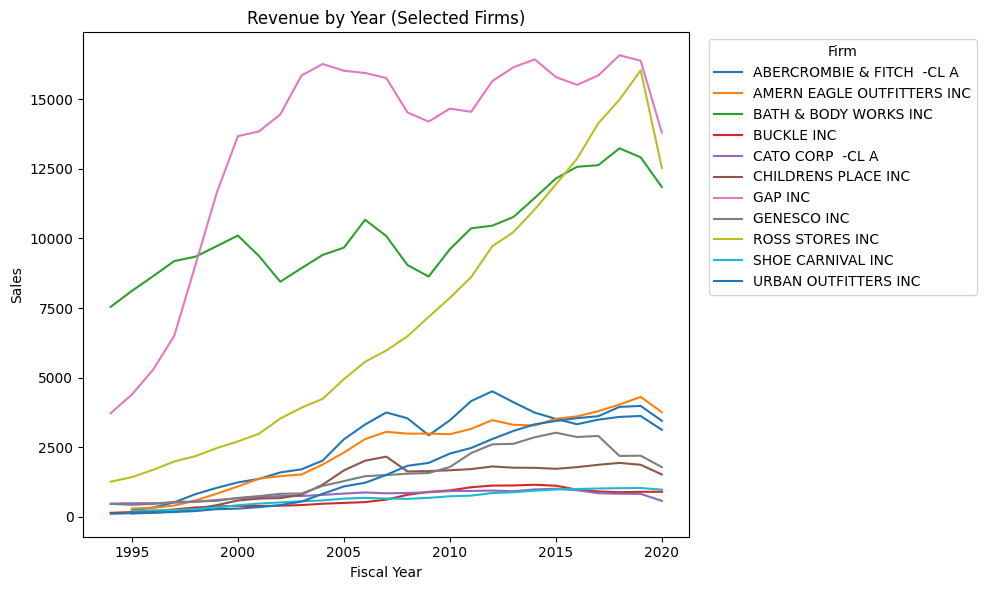

In [ ]:
# Revenue Plot
import matplotlib.pyplot as plt

rev_tbl.plot(figsize=(10,6))
plt.title("Revenue by Year (Selected Firms)")
plt.xlabel("Fiscal Year")
plt.ylabel("Sales")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### 2. Market Share 

In [65]:
# Calculate total sales of selected firms per year
group_total = tf.groupby("fyear")["sale"].sum().rename("group_sale_total")
tf_ms = tf.merge(group_total, on="fyear", how="left")

# Market share
tf_ms["market_share"] = tf_ms["sale"] / tf_ms["group_sale_total"]

# Wide table
ms_tbl = (
    tf_ms.pivot_table(index="fyear", columns="conm", values="market_share", aggfunc="sum")
    .sort_index()
)
ms_tbl.round(4)

ms_tbl

conm,ABERCROMBIE & FITCH -CL A,AMERN EAGLE OUTFITTERS INC,BATH & BODY WORKS INC,BUCKLE INC,CATO CORP -CL A,CHILDRENS PLACE INC,GAP INC,GENESCO INC,ROSS STORES INC,SHOE CARNIVAL INC,URBAN OUTFITTERS INC
fyear,,,,,,,,,,,
1994,NaN,NaN,0.549727,0.010568,0.034696,NaN,0.271264,0.033728,0.091993,NaN,0.008024
1995,0.014682,0.018476,0.505699,0.010734,0.030527,0.007604,0.273828,0.027074,0.088866,0.014221,0.008288
1996,0.018659,0.018160,0.480955,0.011483,0.027345,0.008002,0.293998,0.025667,0.094013,0.013016,0.008702
1997,0.025394,0.019751,0.447333,0.013043,0.024947,0.009374,0.316816,0.026099,0.096814,0.012001,0.008428
1998,0.033723,0.024290,0.386373,0.013968,0.022473,0.011734,0.374284,0.022725,0.090212,0.011581,0.008638
1999,0.036830,0.029410,0.343662,0.013273,0.021384,0.014897,0.411242,0.020278,0.087252,0.012014,0.009759
2000,0.038843,0.034320,0.317140,0.012342,0.021001,0.018436,0.429151,0.021348,0.085025,0.013124,0.009269
2001,0.042312,0.042531,0.290264,0.012017,0.021876,0.020366,0.429301,0.023152,0.092588,0.014774,0.010818
2002,0.048237,0.044228,0.255279,0.012123,0.022621,0.020296,0.436942,0.025038,0.106747,0.015710,0.012779


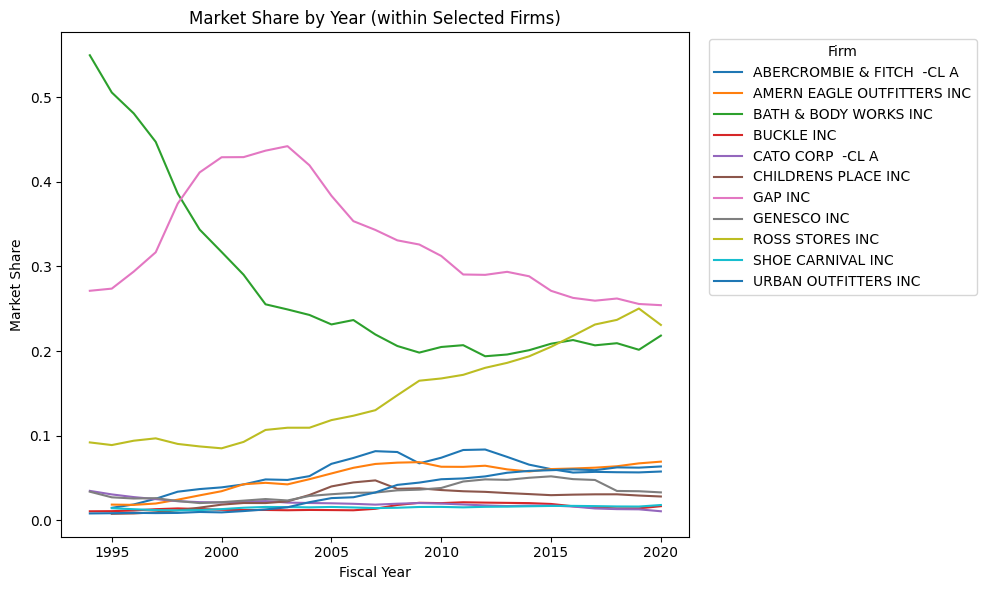

In [66]:
# Market Share Plot
ms_tbl.plot(figsize=(10,6))
plt.title("Market Share by Year (within Selected Firms)")
plt.xlabel("Fiscal Year")
plt.ylabel("Market Share")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### 3. ROA

In [68]:
# Wide table for ROA
roa_tbl = (
    tf.pivot_table(index="fyear", columns="conm", values="roa", aggfunc="mean")
    .sort_index()
)
roa_tbl.round(4)

roa_tbl

conm,ABERCROMBIE & FITCH -CL A,AMERN EAGLE OUTFITTERS INC,BATH & BODY WORKS INC,BUCKLE INC,CATO CORP -CL A,CHILDRENS PLACE INC,GAP INC,GENESCO INC,ROSS STORES INC,SHOE CARNIVAL INC,URBAN OUTFITTERS INC
fyear,,,,,,,,,,,
1994,NaN,NaN,0.098104,0.118307,0.089931,NaN,0.159781,-0.332921,0.072734,NaN,0.190554
1995,0.163046,0.050303,0.182569,0.120551,0.057267,0.051570,0.151101,0.050914,0.079963,-0.070308,0.173067
1996,0.233300,0.053650,0.105390,0.133546,0.032207,0.472107,0.172391,0.046938,0.122680,0.044077,0.147867
1997,0.263712,0.134929,0.050547,0.161085,0.072073,0.066047,0.159970,0.035050,0.159189,0.077349,0.129208
1998,0.319782,0.256547,0.451380,0.182841,0.092518,0.186546,0.208011,0.172944,0.153788,0.084688,0.118174
1999,0.326528,0.255648,0.112719,0.188299,0.118727,0.205014,0.217213,0.086072,0.158393,0.073447,0.121693
2000,0.269155,0.172652,0.104670,0.149770,0.125593,0.184250,0.125126,0.084046,0.155638,0.051897,0.062205
2001,0.218899,0.156818,0.109981,0.124168,0.129761,0.164689,-0.001011,0.101966,0.143199,0.062277,0.076919
2002,0.195950,0.119696,0.069280,0.106951,0.119540,0.028882,0.048218,0.086543,0.147779,0.072238,0.098609


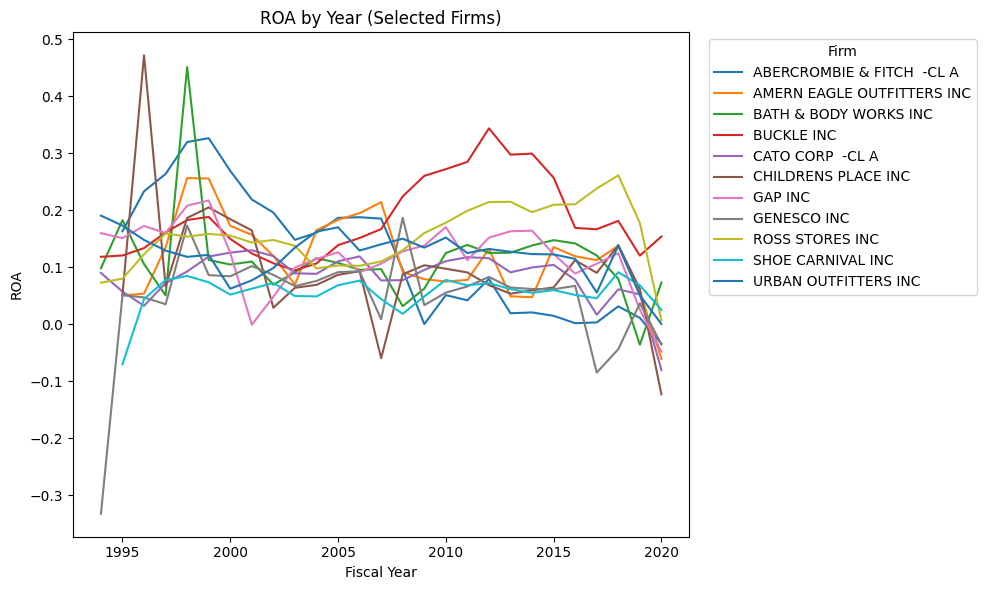

In [69]:
# ROA Plot
roa_tbl.plot(figsize=(10,6))
plt.title("ROA by Year (Selected Firms)")
plt.xlabel("Fiscal Year")
plt.ylabel("ROA")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### 4. Profit Margin

In [70]:
# Wide table for Profit Margin
pm_tbl = (
    tf.pivot_table(index="fyear", columns="conm", values="profit_margin", aggfunc="mean")
    .sort_index()
)
pm_tbl.round(4)

pm_tbl

conm,ABERCROMBIE & FITCH -CL A,AMERN EAGLE OUTFITTERS INC,BATH & BODY WORKS INC,BUCKLE INC,CATO CORP -CL A,CHILDRENS PLACE INC,GAP INC,GENESCO INC,ROSS STORES INC,SHOE CARNIVAL INC,URBAN OUTFITTERS INC
fyear,,,,,,,,,,,
1994,NaN,NaN,0.059425,0.053062,0.038021,NaN,0.086018,-0.175398,0.029164,NaN,0.098228
1995,0.060672,0.022811,0.118456,0.057153,0.024531,0.013551,0.080550,0.023174,0.030337,-0.031499,0.092516
1996,0.073572,0.018152,0.050228,0.066010,0.014301,0.211634,0.085698,0.022551,0.047878,0.017696,0.084775
1997,0.092639,0.048155,0.023658,0.087081,0.033957,0.027218,0.082040,0.016137,0.059071,0.029981,0.080175
1998,0.125106,0.092100,0.219714,0.100703,0.043992,0.072791,0.091064,0.096641,0.061329,0.036505,0.075418
1999,0.143566,0.108953,0.047387,0.099556,0.056081,0.083154,0.096865,0.045182,0.060805,0.035187,0.067655
2000,0.127774,0.085743,0.042348,0.087800,0.058325,0.072678,0.064175,0.043516,0.056018,0.023252,0.035536
2001,0.123583,0.076897,0.055431,0.084775,0.061058,0.070906,-0.000561,0.049637,0.051914,0.026387,0.043005
2002,0.122158,0.060647,0.059443,0.079948,0.061247,0.013306,0.033031,0.043800,0.056969,0.030479,0.064844


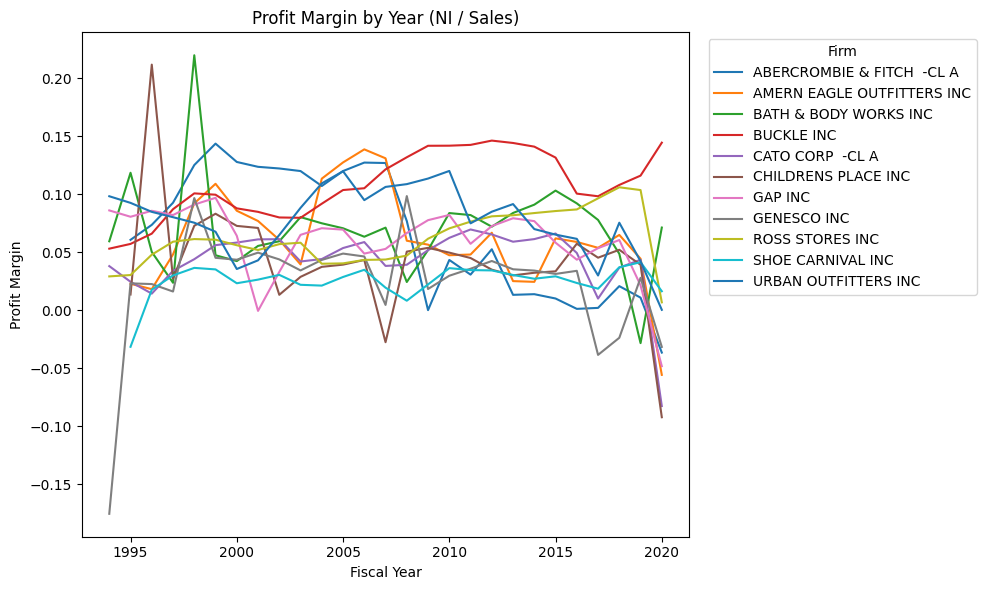

In [71]:
# Profit Margin Plot
pm_tbl.plot(figsize=(10,6))
plt.title("Profit Margin by Year (NI / Sales)")
plt.xlabel("Fiscal Year")
plt.ylabel("Profit Margin")
plt.legend(title="Firm", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

#### 5. CR4 (Top 4 concentration ratio)

In [73]:
cr4 = (
    tf.groupby(["fyear","conm"])["sale"].sum()
      .reset_index()
      .sort_values(["fyear","sale"], ascending=[True, False])
      .groupby("fyear")
      .apply(lambda x: (x["sale"] / x["sale"].sum()).head(4).sum())
      .rename("CR4")
      .reset_index()
)
cr4

/var/folders/7x/90w6m75x04qg2r0z62mc8wh00000gn/T/ipykernel_21558/3479165359.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["sale"] / x["sale"].sum()).head(4).sum())


,fyear,CR4
0,1994,0.947680
1,1995,0.898920
2,1996,0.896312
3,1997,0.887062
4,1998,0.884591
5,1999,0.878985
6,2000,0.870160
7,2001,0.854684
8,2002,0.847205
9,2003,0.848481


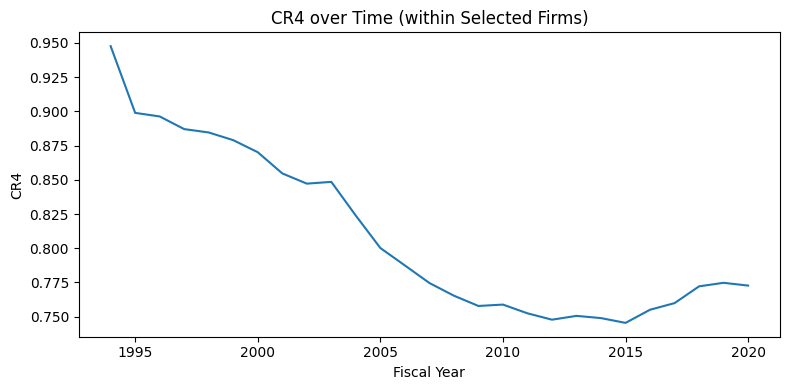

In [74]:
# CR4 Plot
cr4.set_index("fyear")["CR4"].plot(figsize=(8,4))
plt.title("CR4 over Time (within Selected Firms)")
plt.xlabel("Fiscal Year")
plt.ylabel("CR4")
plt.tight_layout()
plt.show()